In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from helper import *
import json
import pickle

In [2]:
pd.set_option('max_columns', 100)

# Prepare data

In [3]:
df = pd.read_csv('../data/historical_data/cleaned_data.csv')
print(df.shape)
df.head()

(525663, 48)


,raceid,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,KeiroCD,Barei,BanusiCode,ChokyosiCode,Futan,Blinker,KisyuCode,BaTaijyu,Zogen,IJyoCD,Honsyokin,GradeCD,Kyori,Special race,Speed,Top 1,Top 3,Top 3 spec race,KakuteiJyuni_fixed,Speed_fixed,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf
0,2008-01-05 01:06,752,8,0,0,1,2005107051,0,3,3,898009,437,540,0,1031,428.0,12.0,0,0,,1200.0,False,1.595745,False,False,False,47.2,0.980593,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2008-01-05 01:06,739,1,0,0,2,2005102028,0,3,3,498800,138,540,0,733,450.0,-10.0,0,50000,,1200.0,False,1.623816,True,True,False,1.0,0.997843,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2008-01-05 01:06,742,3,0,0,3,2005104156,0,3,3,486800,1054,540,0,684,458.0,4.0,0,13000,,1200.0,False,1.617251,False,True,False,14.2,0.993809,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2008-01-05 01:06,749,6,0,0,4,2005105319,0,3,3,515800,1081,540,0,672,402.0,-10.0,0,0,,1200.0,False,1.602136,False,False,False,34.0,0.984521,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2008-01-05 01:06,739,2,0,0,5,2005101044,0,3,3,163002,1088,540,0,663,482.0,2.0,0,20000,,1200.0,False,1.623816,False,True,False,7.6,0.997843,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
nrace_test = int(df['raceid'].apply(lambda x: True if x.split('-')[0] == '2018' else False).sum())
print('Number of races in 2018:', nrace_test)

Number of races in 2018: 25402


In [5]:
drop_cols = [
'IJyoCD', 
'KeiroCD', 
'ChokyosiCode', 
'Honsyokin',
'KettoNum',
'Time', 
'raceid', 
'racedate', 
'KakuteiJyuni', 
'KakuteiJyuni_fixed', 
'Top 1', 
'Top 3',
'Top 3 spec race',
'Speed', 
'GradeCD',
'Speed_fixed', 
'DochakuKubun', 
'DochakuTosu',
'KisyuCode',
'BanusiCode']

In [6]:
X = df
y = df['Top 3']
top3 = df['Top 3']
raceid = df['raceid']
X_train, X_test, y_train, y_test, top3_train, top3_test, raceid_train, raceid_test = split_data(X, y, raceid, top3,
                                                                                                drop_columns=drop_cols,
                                                                                                select_cols=None,
                                                                                                test_size=nrace_test)
y_reg = df['KakuteiJyuni_fixed']
y_reg_train = y_reg[y_train.index]
y_reg_test = y_reg[y_test.index]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(500261, 29) (500261,)
(25402, 29) (25402,)


,Umaban,UmaKigoCD,Barei,Futan,Blinker,BaTaijyu,Zogen,Kyori,Special race,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf
0,1,0,3,540,0,428.0,12.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,0,3,540,0,450.0,-10.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,0,3,540,0,458.0,4.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,0,3,540,0,402.0,-10.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,5,0,3,540,0,482.0,2.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Metrics

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Baseline model

In [8]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

## Classification

In [13]:
model_Log = LogisticRegression(max_iter=300)
model_Log.fit(scaler.transform(X_train), y_train)

LogisticRegression(max_iter=300)

In [ ]:
top3_pred = predict_top3_prob(model_Log, scaler.transform(X_train), raceid_train)
print('Total accuracy:', accuracy_score(top3_train, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_train.values, top3_pred['Top 3'].values))
sns.heatmap(confusion_matrix(top3_train, top3_pred['Top 3']), annot=True, fmt='.0f', cmap='Blues')

Total accuracy: 0.7098653649318951
Top 3 prediction accuracy: 0.2994885394961167


<AxesSubplot:>

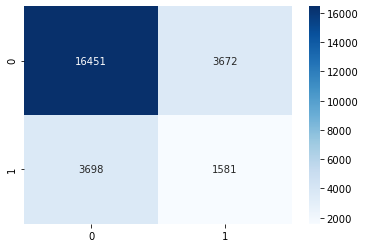

In [15]:
top3_pred = predict_top3_prob(model_Log, scaler.transform(X_test), raceid_test)
print('Total accuracy:', accuracy_score(top3_test, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_test.values, top3_pred['Top 3'].values))
sns.heatmap(confusion_matrix(top3_test, top3_pred['Top 3']), annot=True, fmt='.0f', cmap='Blues')

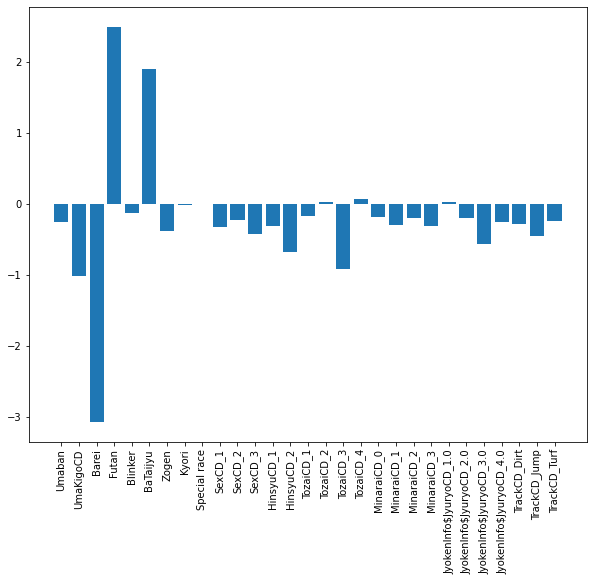

In [19]:
plt.figure(figsize=(10,8))
plt.bar(height=model_Log.coef_[0], x = X_train.columns)
xticks = plt.xticks(rotation=90)

## Regression

In [ ]:
model_reg = LinearRegression()
model_reg.fit(scaler.transform(X_train), y_reg_train)

Total accuracy: 0.7104165026375876
Top 3 prediction accuracy: 0.30081454820988823


<AxesSubplot:>

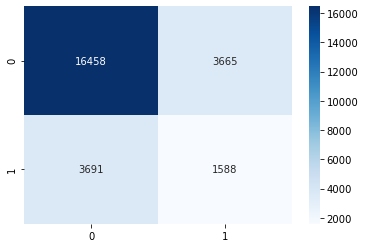

In [18]:
top3_pred = predict_top3_time(model_reg, scaler.transform(X_test), raceid_test)
print('Total accuracy:', accuracy_score(top3_test, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_test.values, top3_pred['Top 3'].values))
sns.heatmap(confusion_matrix(top3_test, top3_pred['Top 3']), annot=True, fmt='.0f', cmap='Blues')

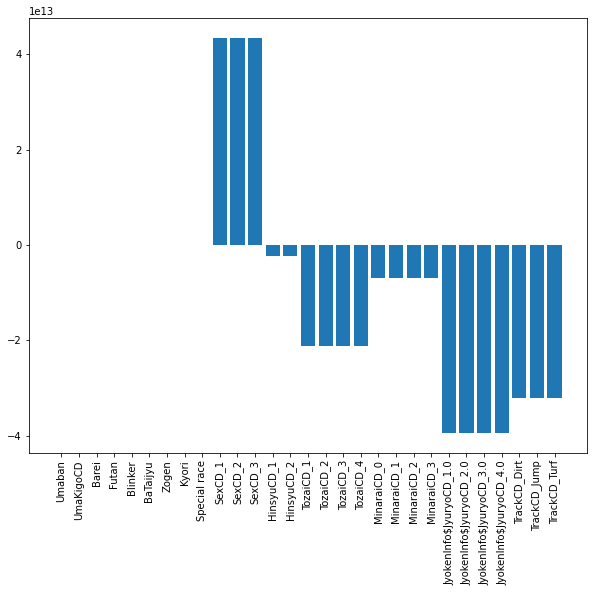

In [21]:
plt.figure(figsize=(10,8))
plt.bar(height=model_reg.coef_, x = X_train.columns)
xticks = plt.xticks(rotation=90)

# Better model

## Calculate some fields

In [9]:
df['Top 5'] = (df['KakuteiJyuni'] < 6) & (df['KakuteiJyuni'] != 0)
drop_cols.append('Top 5')

In [10]:
horse_exp = {}
jockey_exp = {}
owner_exp = {}
coach_exp = {}

In [11]:
top5_mean = df['Top 5'].sum()/df.shape[0]
top3_mean = df['Top 3'].sum()/df.shape[0]
top5_mean, top3_mean

(0.3456415992755815, 0.20745230309152443)

In [12]:
horse_exp['n_races'] = generate_exp('KettoNum', init_val=1.)
df['horse_n_races'] = df.apply(horse_exp['n_races'].generate_exp, axis=1)

horse_exp['n_spec_races'] = generate_exp('KettoNum', init_val=0., val='Special race')
df['horse_n_spec_races'] = df.apply(horse_exp['n_spec_races'].generate_exp, axis=1)

horse_exp['top1'] = generate_exp('KettoNum', val='Top 1')
df['horse_top1'] = df.apply(horse_exp['top1'].generate_exp, axis=1)

horse_exp['top3'] = generate_exp('KettoNum', val='Top 3')
df['horse_top3'] = df.apply(horse_exp['top3'].generate_exp, axis=1)

horse_exp['top3_spec'] = generate_exp('KettoNum', val='Top 3 spec race')
df['horse_top3_spec'] = df.apply(horse_exp['top3_spec'].generate_exp, axis=1)

horse_exp['top5'] = generate_exp('KettoNum', val='Top 5')
df['horse_top5'] = df.apply(horse_exp['top5'].generate_exp, axis=1)

# horse_exp['beta=0.2'] = generate_exp('KettoNum', val='KakuteiJyuni_fixed', beta=0.2, init_val=50.)
# df['horse_beta=0.2'] = df.apply(horse_exp['beta=0.2'].moving_average, axis=1)
horse_exp['beta=0.3'] = generate_exp('KettoNum', val='KakuteiJyuni_fixed', beta=0.3, init_val=50.)
df['horse_beta=0.3'] = df.apply(horse_exp['beta=0.3'].moving_average, axis=1)
# add
horse_exp['beta=0.5'] = generate_exp('KettoNum', val='KakuteiJyuni_fixed', beta=0.5, init_val=50.)
df['horse_beta=0.5'] = df.apply(horse_exp['beta=0.5'].moving_average, axis=1)
horse_exp['beta=1.'] = generate_exp('KettoNum', val='KakuteiJyuni_fixed', beta=1., init_val=50.)
df['horse_beta=1.'] = df.apply(horse_exp['beta=1.'].moving_average, axis=1)

horse_exp['beta=0.3_top1'] = generate_exp('KettoNum', val='Top 1', beta=0.3, init_val=0.0)
df['horse_beta=0.3_top1'] = df.apply(horse_exp['beta=0.3_top1'].moving_average, axis=1)

horse_exp['beta=0.3_top3'] = generate_exp('KettoNum', val='Top 3', beta=0.3, init_val=top3_mean)
df['horse_beta=0.3_top3'] = df.apply(horse_exp['beta=0.3_top3'].moving_average, axis=1)

horse_exp['beta=0.2_top5'] = generate_exp('KettoNum', val='Top 5', beta=0.2, init_val=top5_mean)
df['horse_beta=0.2_top5'] = df.apply(horse_exp['beta=0.2_top5'].moving_average, axis=1)
horse_exp['beta=0.3_top5'] = generate_exp('KettoNum', val='Top 5', beta=0.3, init_val=top5_mean)
df['horse_beta=0.3_top5'] = df.apply(horse_exp['beta=0.3_top5'].moving_average, axis=1)

horse_exp['beta=0.3_speed'] = generate_exp('KettoNum', val='Speed_fixed', beta=0.3, init_val=1.)
df['horse_beta=0.3_speed'] = df.apply(horse_exp['beta=0.3_speed'].moving_average, axis=1)
# add
horse_exp['beta=0.5_speed'] = generate_exp('KettoNum', val='Speed_fixed', beta=0.5, init_val=1.)
df['horse_beta=0.5_speed'] = df.apply(horse_exp['beta=0.5_speed'].moving_average, axis=1)

##################

jockey_exp['n_races'] = generate_exp('KisyuCode', init_val=1.)
df['jockey_n_races'] = df.apply(jockey_exp['n_races'].generate_exp, axis=1)

jockey_exp['n_spec_races'] = generate_exp('KisyuCode', init_val=0., val='Special race')
df['jockey_n_spec_races'] = df.apply(jockey_exp['n_spec_races'].generate_exp, axis=1)

jockey_exp['top1'] = generate_exp('KisyuCode', val='Top 1')
df['jockey_top1'] = df.apply(jockey_exp['top1'].generate_exp, axis=1)

jockey_exp['top3'] = generate_exp('KisyuCode', val='Top 3')
df['jockey_top3'] = df.apply(jockey_exp['top3'].generate_exp, axis=1)

jockey_exp['top3_spec'] = generate_exp('KisyuCode', val='Top 3 spec race')
df['jockey_top3_spec'] = df.apply(jockey_exp['top3_spec'].generate_exp, axis=1)

jockey_exp['top5'] = generate_exp('KisyuCode', val='Top 5')
df['jockey_top5'] = df.apply(jockey_exp['top5'].generate_exp, axis=1)

jockey_exp['beta=0.07'] = generate_exp('KisyuCode', val='KakuteiJyuni_fixed', beta=0.07, init_val=50.)
df['jockey_beta=0.07'] = df.apply(jockey_exp['beta=0.07'].moving_average, axis=1)
jockey_exp['beta=0.1'] = generate_exp('KisyuCode', val='KakuteiJyuni_fixed', beta=0.1, init_val=50.)
df['jockey_beta=0.1'] = df.apply(jockey_exp['beta=0.1'].moving_average, axis=1)
jockey_exp['beta=0.2'] = generate_exp('KisyuCode', val='KakuteiJyuni_fixed', beta=0.2, init_val=50.)
df['jockey_beta=0.2'] = df.apply(jockey_exp['beta=0.2'].moving_average, axis=1)

# edit 0.2 -> 0.07
jockey_exp['beta=0.07_top3'] = generate_exp('KisyuCode', val='Top 3', beta=0.07, init_val=top3_mean)
df['jockey_beta=0.07_top3'] = df.apply(jockey_exp['beta=0.07_top3'].moving_average, axis=1)
jockey_exp['beta=0.1_top3'] = generate_exp('KisyuCode', val='Top 3', beta=0.1, init_val=top3_mean)
df['jockey_beta=0.1_top3'] = df.apply(jockey_exp['beta=0.1_top3'].moving_average, axis=1)

jockey_exp['beta=0.2_top5'] = generate_exp('KisyuCode', val='Top 5', beta=0.2, init_val=0.3)
df['jockey_beta=0.2_top5'] = df.apply(jockey_exp['beta=0.2_top5'].moving_average, axis=1)
jockey_exp['beta=0.1_top5'] = generate_exp('KisyuCode', val='Top 5', beta=0.1, init_val=0.3)
df['jockey_beta=0.1_top5'] = df.apply(jockey_exp['beta=0.1_top5'].moving_average, axis=1)

# 0.2 -> 0.3
jockey_exp['beta=0.3_speed'] = generate_exp('KisyuCode', val='Speed_fixed', beta=0.3, init_val=1.)
df['jockey_beta=0.3_speed'] = df.apply(jockey_exp['beta=0.3_speed'].moving_average, axis=1)
jockey_exp['beta=0.1_speed'] = generate_exp('KisyuCode', val='Speed_fixed', beta=0.1, init_val=1.)
df['jockey_beta=0.1_speed'] = df.apply(jockey_exp['beta=0.1_speed'].moving_average, axis=1)


##################
owner_exp['n_races'] = generate_exp('BanusiCode', init_val=1.)
df['owner_n_races'] = df.apply(owner_exp['n_races'].generate_exp, axis=1)

owner_exp['top1'] = generate_exp('BanusiCode', val='Top 1')
df['owner_top1'] = df.apply(owner_exp['top1'].generate_exp, axis=1)

owner_exp['top3'] = generate_exp('BanusiCode', val='Top 3')
df['owner_top3'] = df.apply(owner_exp['top3'].generate_exp, axis=1)

owner_exp['top5'] = generate_exp('BanusiCode', val='Top 5')
df['owner_top5'] = df.apply(owner_exp['top3'].generate_exp, axis=1)

##################
coach_exp['n_races'] = generate_exp('ChokyosiCode', init_val=1.)
df['coach_n_races'] = df.apply(coach_exp['n_races'].generate_exp, axis=1)

coach_exp['top1'] = generate_exp('ChokyosiCode', val='Top 1')
df['coach_top1'] = df.apply(coach_exp['top1'].generate_exp, axis=1)

coach_exp['top3'] = generate_exp('ChokyosiCode', val='Top 3')
df['coach_top3'] = df.apply(coach_exp['top3'].generate_exp, axis=1)

coach_exp['top5'] = generate_exp('ChokyosiCode', val='Top 5')
df['coach_top5'] = df.apply(coach_exp['top5'].generate_exp, axis=1)

In [13]:

df['horse_top3_rate'] = df['horse_top3']/df['horse_n_races']
df['horse_top3_spec_rate'] = (df['horse_top3_spec']/df['horse_n_spec_races']).fillna(0.)
df['horse_top5_rate'] = df['horse_top5']/df['horse_n_races']

df['owner_top3_rate'] = df['owner_top3']/df['owner_n_races']
df['owner_top5_rate'] = df['owner_top5']/df['owner_n_races']

df['jockey_top3_rate'] = df['jockey_top3']/df['jockey_n_races']
df['jockey_top3_spec_rate'] = (df['jockey_top3_spec']/df['jockey_n_spec_races']).fillna(0.)
df['jockey_top5_rate'] = df['jockey_top5']/df['jockey_n_races']
df.isna().sum().sum()

0

## Split data

In [14]:
X = df
y = df['Top 3']
top3 = df['Top 3']
raceid = df['raceid']
X_train, X_test, y_train, y_test, top3_train, top3_test, raceid_train, raceid_test = split_data(X, y, raceid, top3,
                                                                                                drop_columns=drop_cols,
                                                                                                select_cols=None,
                                                                                                test_size=nrace_test)
y_reg = df['KakuteiJyuni_fixed']
y_reg_train = y_reg[y_train.index]
y_reg_test = y_reg[y_test.index]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(500261, 75) (500261,)
(25402, 75) (25402,)


,Umaban,UmaKigoCD,Barei,Futan,Blinker,BaTaijyu,Zogen,Kyori,Special race,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf,horse_n_races,horse_n_spec_races,horse_top1,horse_top3,horse_top3_spec,horse_top5,horse_beta=0.3,horse_beta=0.5,horse_beta=1.,horse_beta=0.3_top1,horse_beta=0.3_top3,horse_beta=0.2_top5,horse_beta=0.3_top5,horse_beta=0.3_speed,horse_beta=0.5_speed,jockey_n_races,jockey_n_spec_races,jockey_top1,jockey_top3,jockey_top3_spec,jockey_top5,jockey_beta=0.07,jockey_beta=0.1,jockey_beta=0.2,jockey_beta=0.07_top3,jockey_beta=0.1_top3,jockey_beta=0.2_top5,jockey_beta=0.1_top5,jockey_beta=0.3_speed,jockey_beta=0.1_speed,owner_n_races,owner_top1,owner_top3,owner_top5,coach_n_races,coach_top1,coach_top3,coach_top5,horse_top3_rate,horse_top3_spec_rate,horse_top5_rate,owner_top3_rate,owner_top5_rate,jockey_top3_rate,jockey_top3_spec_rate,jockey_top5_rate
0,1,0,3,540,0,428.0,12.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.0,0.207452,0.345642,0.345642,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.207452,0.207452,0.3,0.3,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
1,2,0,3,540,0,450.0,-10.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.0,0.207452,0.345642,0.345642,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.207452,0.207452,0.3,0.3,1.0,1.0,1.0,0.0,0.0,173.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.0,0.0
2,3,0,3,540,0,458.0,4.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.0,0.207452,0.345642,0.345642,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.207452,0.207452,0.3,0.3,1.0,1.0,1.0,0.0,0.0,2651.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2651.0,0.0,0.0,0.0
3,4,0,3,540,0,402.0,-10.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.0,0.207452,0.345642,0.345642,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.207452,0.207452,0.3,0.3,1.0,1.0,1.0,0.0,0.0,518.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,518.0,0.0,0.0,0.0
4,5,0,3,540,0,482.0,2.0,1200.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.0,0.207452,0.345642,0.345642,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,0.207452,0.207452,0.3,0.3,1.0,1.0,1.0,0.0,0.0,202.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202.0,0.0,0.0,0.0


## Model

In [30]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [31]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

### Classification

In [ ]:
model_Log = LogisticRegression(max_iter=300)
model_Log.fit(X_train_sc, y_train)

Total accuracy: 0.7741019187983872
Top 3 prediction accuracy: 0.45468560306785116


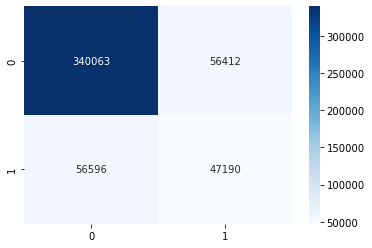

In [25]:
top3_pred = predict_top3_prob(model_Log, X_train_sc, raceid_train)
print('Total accuracy:', accuracy_score(top3_train, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_train.values, top3_pred['Top 3'].values))
ax = sns.heatmap(confusion_matrix(top3_train, top3_pred['Top 3']), annot=True, fmt='.0f', cmap='Blues')

Total accuracy: 0.7836390835367294
F1 Score: 0.7834418643878538
Top 3 prediction accuracy: 0.476984277325251


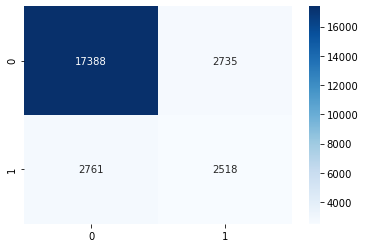

In [40]:
top3_pred = predict_top3_prob(model_Log, X_test_sc, raceid_test)
print('Total accuracy:', accuracy_score(top3_test, top3_pred['Top 3']))
print('F1 Score:', f1_score(top3_test, top3_pred['Top 3'], average='weighted'))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_test.values, top3_pred['Top 3'].values))
ax = sns.heatmap(confusion_matrix(top3_test, top3_pred['Top 3']), annot=True, fmt='.0f', cmap='Blues')

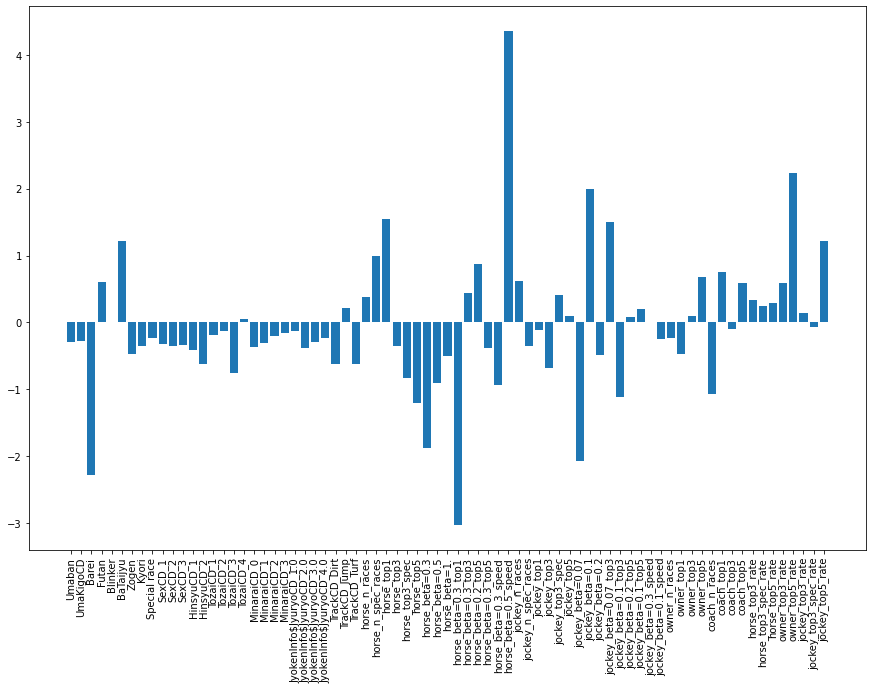

In [46]:
plt.figure(figsize=(15,10))
plt.bar(height=model_Log.coef_[0], x = list(map(str, X_train.columns)))
xticks = plt.xticks(rotation=90)

### Regression

In [36]:
model_reg = LinearRegression()
model_reg.fit(X_train_sc, y_reg_train)

LinearRegression()

In [ ]:
top3_pred = predict_top3_prob(model_reg, X_train_sc, raceid_train)
print('Total accuracy:', accuracy_score(top3_train, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_train.values, top3_pred['Top 3'].values))
ax = sns.heatmap(confusion_matrix(top3_train, top3_pred['Top 3']), annot=True, fmt='.0f', cmap='Blues')

Total accuracy: 0.7826155420833005
F1 Score: 0.7824173899471848
Top 3 prediction accuracy: 0.47452168971396097


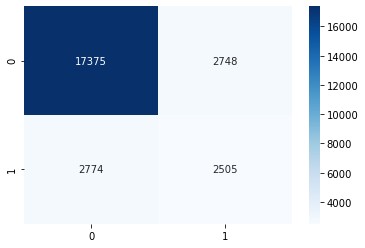

In [39]:
top3_pred = predict_top3_time(model_reg, X_test_sc, raceid_test)
print('Total accuracy:', accuracy_score(top3_test, top3_pred['Top 3']))
print('F1 Score:', f1_score(top3_test, top3_pred['Top 3'], average='weighted'))
print('Top 3 prediction accuracy:', top3_accuracy_score(top3_test.values, top3_pred['Top 3'].values))
ax = sns.heatmap(confusion_matrix(top3_test, top3_pred['Top 3']), annot=True, fmt='.0f', cmap='Blues')

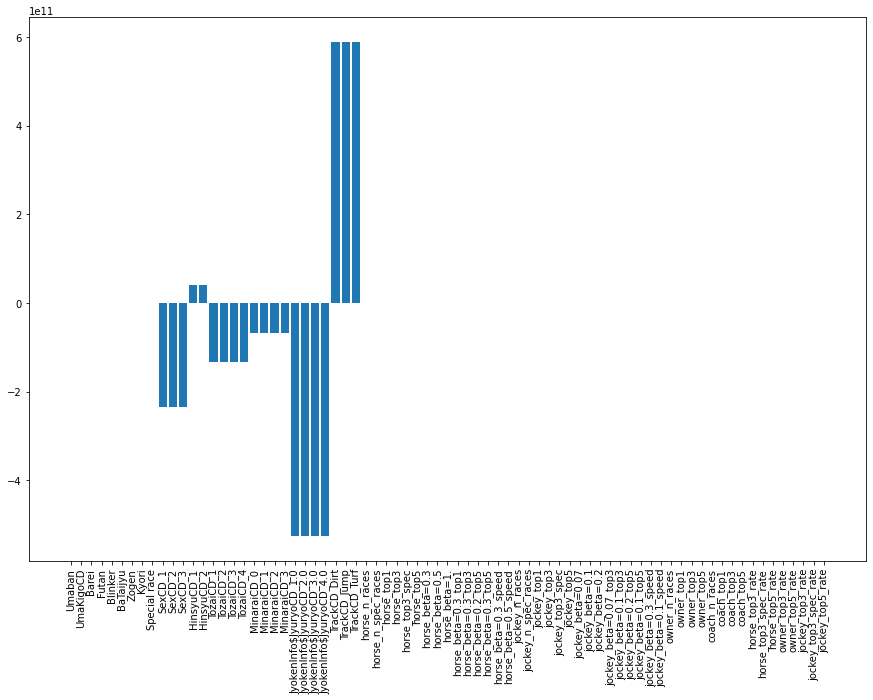

In [45]:
plt.figure(figsize=(15,10))
plt.bar(height=model_reg.coef_, x = list(map(str, X_train.columns)))
xticks = plt.xticks(rotation=90)

## Feature selection

In [47]:
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_val, y_train, y_val, top3_train, top3_val, raceid_train, raceid_val = split_data(X_train, y_train, raceid_train, top3_train,
                                                                                            drop_columns=None,
                                                                                            select_cols=None,
                                                                                            test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

In [51]:
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

### Selector

In [48]:
model_tree = DecisionTreeClassifier(max_depth=50)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [52]:
selectors = {}

In [53]:
selectors['tree'] = SelectFromModel(estimator=model_tree, prefit=True, max_features=40)
selectors['log'] = SelectFromModel(estimator=model_Log, prefit=True, max_features=40)

In [ ]:
selectors['RFE'] = RFE(estimator=LogisticRegression(), n_features_to_select=30)
selectors['RFE'] = selectors['RFE'].fit(X_train_sc, y_train)

### Evaluate

In [61]:
scores = {}
for selector in selectors:
    print(selector,selectors[selector].get_support().sum())

tree 34
log 23
RFE 30


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
for selector in selectors:
    scores[selector] = {}
    X_train_trs = selectors[selector].transform(X_train_sc)
    X_val_trs = selectors[selector].transform(X_val_sc)
    model_tree_base = AdaBoostClassifier()
    model_tree_base.fit(X_train_trs, y_train.values)
    top3_pred = predict_top3_prob(model_tree_base, X_val_trs, raceid_val)
    scores[selector]['tree'] = top3_accuracy_score(top3_val, top3_pred['Top 3'])

    model_linear_base = LogisticRegression(max_iter=200)
    model_linear_base.fit(X_train_trs, y_train.values)
    top3_pred = predict_top3_prob(model_linear_base, X_val_trs, raceid_val)
    scores[selector]['linear']=top3_accuracy_score(top3_val, top3_pred['Top 3'])

In [68]:
with open(r'..\reports\feature_selector_scores.json', 'w') as f:
    f.write(json.dumps(scores))
selected_features = X_train.columns[selectors['RFE'].get_support()]

# Select some algorithms

In [76]:
from sklearn.ensemble import (
ExtraTreesClassifier,
RandomForestClassifier,
AdaBoostClassifier,
GradientBoostingClassifier)

In [77]:
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

## Logistic regression

In [79]:
scores = {}

In [78]:
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

In [80]:
model_log = LogisticRegression(max_iter=500)
model_log.fit(X_train_sc, y_train)

LogisticRegression(max_iter=500)

In [89]:
top3_pred = predict_top3_prob(model_log, X_val_sc, raceid_val)
scores['log'] = top3_accuracy_score(top3_val.values, top3_pred['Top 3'].values)
print('Total accuracy:', accuracy_score(top3_val, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', scores['log'])

Total accuracy: 0.775937386239534
Top 3 prediction accuracy: 0.46525040853599925


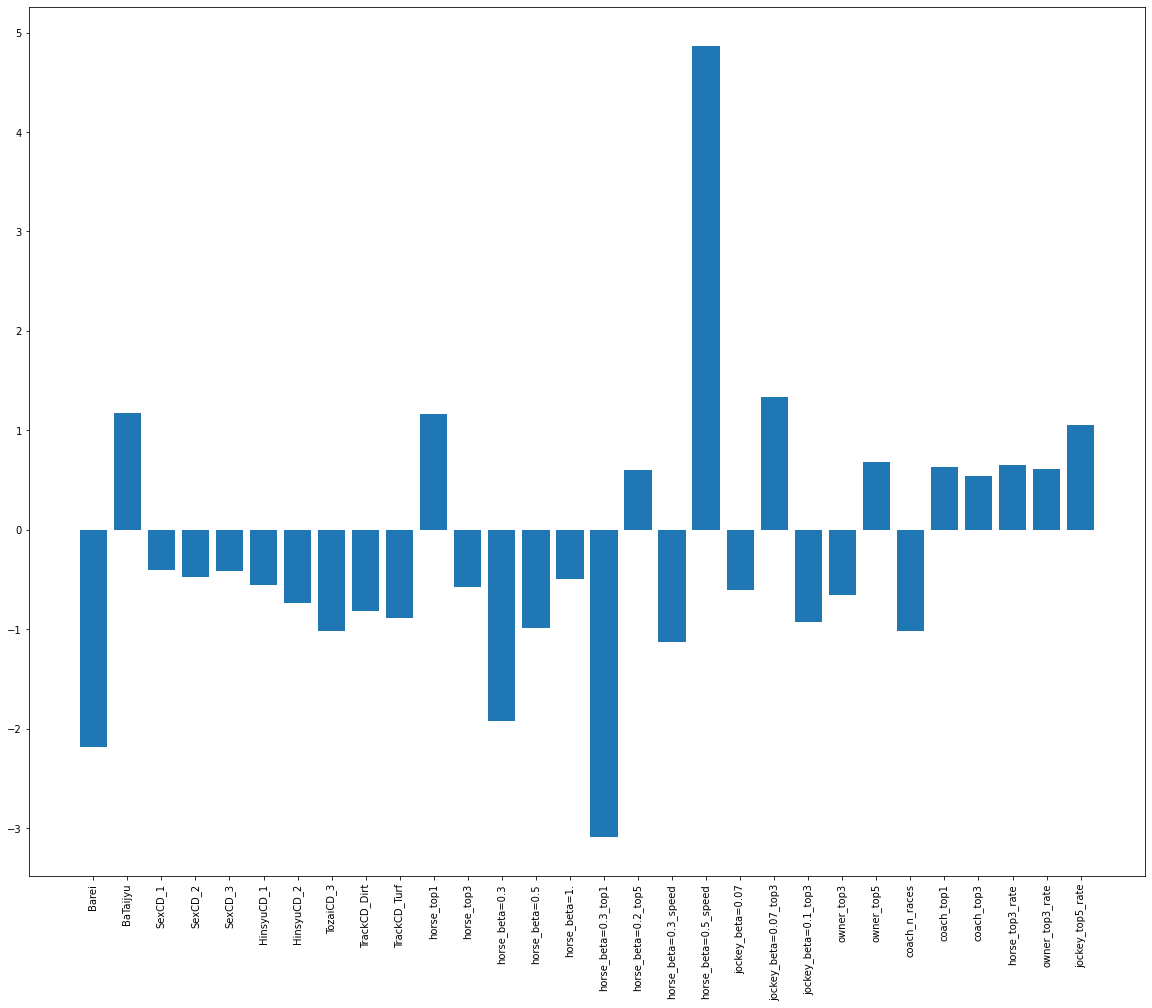

In [90]:
plt.figure(figsize=(20,16))
plt.bar(height=model_log.coef_[0], x = list(map(str, X_train.columns)))
xticks = plt.xticks(rotation=90)

## Random forest

In [84]:
model_forest = RandomForestClassifier(n_estimators=50)
model_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [86]:
top3_pred = predict_top3_prob(model_forest, X_val, raceid_val)
scores['forest'] = top3_accuracy_score(top3_val.values, top3_pred['Top 3'].values)
print('Total accuracy:', accuracy_score(top3_val, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', scores['forest'])

Total accuracy: 0.7652995186668284
Top 3 prediction accuracy: 0.43996923964241086


## AdaBoost

In [92]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [93]:
top3_pred = predict_top3_prob(model_ada, X_val, raceid_val)
scores['ada'] = top3_accuracy_score(top3_val.values, top3_pred['Top 3'].values)
print('Total accuracy:', accuracy_score(top3_val, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', scores['ada'])

Total accuracy: 0.7721352586660195
Top 3 prediction accuracy: 0.4562145534941844


## Gradient boost

In [95]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [96]:
top3_pred = predict_top3_prob(model_gb, X_val, raceid_val)
scores['gb'] = top3_accuracy_score(top3_val.values, top3_pred['Top 3'].values)
print('Total accuracy:', accuracy_score(top3_val, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', scores['gb'])

Total accuracy: 0.778526068842778
Top 3 prediction accuracy: 0.4714024800538306


## DNN model

In [99]:
ckpt_folder = '../src/modelcheckpoint/'

### Model

In [100]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [101]:
model_nn.compile(
                loss = tf.keras.losses.BinaryFocalCrossentropy(),
                # loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['acc'])

In [102]:
callbacks = callbacks=[tf.keras.callbacks.ReduceLROnPlateau(fractions=0.1,monitor='val_loss', patience=3),
                       tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, min_delta=0.0001),
                       tf.keras.callbacks.ModelCheckpoint(ckpt_folder+'model_dnn.hdf5', save_best_only=True)]

In [103]:
history = model_nn.fit(X_train_sc, y_train,
                       epochs = 200,
                       validation_data=(X_val_sc, y_val),
                       batch_size=1024,
                    #    class_weight={0:0.2, 1:0.8},
                       callbacks=callbacks)

Epoch 1/200
441/441 [==============================] - 3s 5ms/step - loss: 0.1180 - acc: 0.7952 - val_loss: 0.1164 - val_acc: 0.7945 - lr: 0.0010
Epoch 2/200
441/441 [==============================] - 2s 4ms/step - loss: 0.1159 - acc: 0.7977 - val_loss: 0.1159 - val_acc: 0.7966 - lr: 0.0010
Epoch 3/200
441/441 [==============================] - 2s 4ms/step - loss: 0.1155 - acc: 0.7985 - val_loss: 0.1158 - val_acc: 0.7968 - lr: 0.0010
Epoch 4/200
441/441 [==============================] - 2s 4ms/step - loss: 0.1153 - acc: 0.7985 - val_loss: 0.1157 - val_acc: 0.7970 - lr: 0.0010
Epoch 5/200
441/441 [==============================] - 2s 4ms/step - loss: 0.1151 - acc: 0.7989 - val_loss: 0.1161 - val_acc: 0.7947 - lr: 0.0010
Epoch 6/200
441/441 [==============================] - 2s 4ms/step - loss: 0.1150 - acc: 0.7994 - val_loss: 0.1153 - val_acc: 0.7973 - lr: 0.0010
Epoch 7/200
441/441 [==============================] - 2s 4ms/step - loss: 0.1149 - acc: 0.7995 - val_loss: 0.1154 - val_acc

### Evaluate

In [104]:
model_nn = tf.keras.models.load_model(ckpt_folder + 'model_dnn.hdf5')

In [105]:
top3_pred = predict_top3_prob(model_nn, X_val_sc, raceid_val)
scores['dnn'] = top3_accuracy_score(top3_val.values, top3_pred['Top 3'].values)
print('Total accuracy:', accuracy_score(top3_val, top3_pred['Top 3']))
print('Top 3 prediction accuracy:', scores['dnn'])

Total accuracy: 0.7794563766533188
Top 3 prediction accuracy: 0.47361338075555126


In [107]:
with open(r'..\reports\algorithm_selection.json', 'w') as f:
    f.write(json.dumps(scores))

# Horses, jockeys, owners, coaches info

In [109]:
def last_race_info(col):
    idx = max(col.index)
    return col[idx]

## Jockeys

In [116]:
jockey_df = df.loc[:, ['jockey_n_races']+[col for col in selected_features if 'jockey' in col]]
jockey_df = jockey_df.groupby(df['KisyuCode'].astype(str)).agg(dict([(key, last_race_info) for key in jockey_df.columns]))
jockey_df.to_csv(data_path + 'jockey_info.csv', index=True)

In [117]:
jockey_df.head()

,jockey_n_races,jockey_beta=0.07,jockey_beta=0.07_top3,jockey_beta=0.1_top3,jockey_top5_rate
KisyuCode,,,,,
1001,140.0,67.384403,0.061902,0.058235,0.178571
1003,246.0,58.272148,0.119594,0.128676,0.292683
1004,4041.0,62.637735,0.014356,0.005169,0.210344
1005,596.0,62.873930,0.206196,0.203323,0.511745
1006,1036.0,67.185129,0.074959,0.090084,0.205598


## Owners

In [118]:
owner_df = df.loc[:, ['owner_n_races']+[col for col in selected_features if 'owner' in col]]
owner_df = owner_df.groupby(df['BanusiCode'].astype(str)).agg(dict([(key, last_race_info) for key in owner_df.columns]))
owner_df.to_csv(data_path + 'owner_info.csv', index=True)

## Coaches

In [119]:
coach_df = df.loc[:,[col for col in selected_features if 'coach' in col]]
coach_df = coach_df.groupby(df['ChokyosiCode'].astype(str)).agg(dict([(key, last_race_info) for key in coach_df.columns]))
coach_df.to_csv(data_path + 'coach_info.csv', index=True)

## Horse

In [124]:
horse_cols = ['ChokyosiCode','BanusiCode', 'horse_n_races'] + [col for col in selected_features if col not in list(jockey_df.columns) + list(coach_df.columns) + list(owner_df.columns)]

In [127]:
horse_df = df.loc[:,horse_cols]
horse_df = horse_df.groupby(df['KettoNum'].astype(str)).agg(dict([(key, last_race_info) for key in horse_df.columns]))
horse_df.to_csv(data_path+'horse_info.csv', index=True)

# Init values

In [128]:
features = {
    'selected_features': list(selected_features),
    'horse' : list(horse_df.columns),
    'jockey' : list(jockey_df.columns)
}
with open('../src/app_data/selected_features.json', 'w') as f:
    f.write(json.dumps(features))

In [141]:
init_vals = {}
for field in horse_exp:
    init_vals['horse_' + field] = horse_exp[field].init_val
for field in jockey_exp:
    init_vals['jockey_' + field] = jockey_exp[field].init_val
for field in owner_exp:
    init_vals['owner_' + field] = owner_exp[field].init_val
for field in coach_exp:
    init_vals['coach_' + field] = coach_exp[field].init_val

for col in selected_features:
    if col not in init_vals:
        init_vals[col] = df[col].mean()

for col in ['SexCD_1', 'SexCD_2', 'SexCD_3','HinsyuCD_2', 'TozaiCD_3', 'TrackCD_Dirt', 'TrackCD_Turf']:
    init_vals[col] = 0.0
init_vals['HinsyuCD_1'] = 1.0


with open('../src/app_data/init_val.json', 'w') as f:
    f.write(json.dumps(init_vals))

In [143]:
df = df[list(selected_features)+['KettoNum','Top 1','Top 3','Top 5','raceid']]

In [144]:
df.to_csv(r'..\data\selected_data.csv', index=False)